In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
#EDA

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [50]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.shape

(20640, 10)

In [54]:
df = df.dropna()
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [58]:
df.shape

(20433, 10)

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
new_ocean = le.fit_transform(df["ocean_proximity"])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df["ocean_proximity"]= new_ocean

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [14]:
columns = np.array(df.columns)

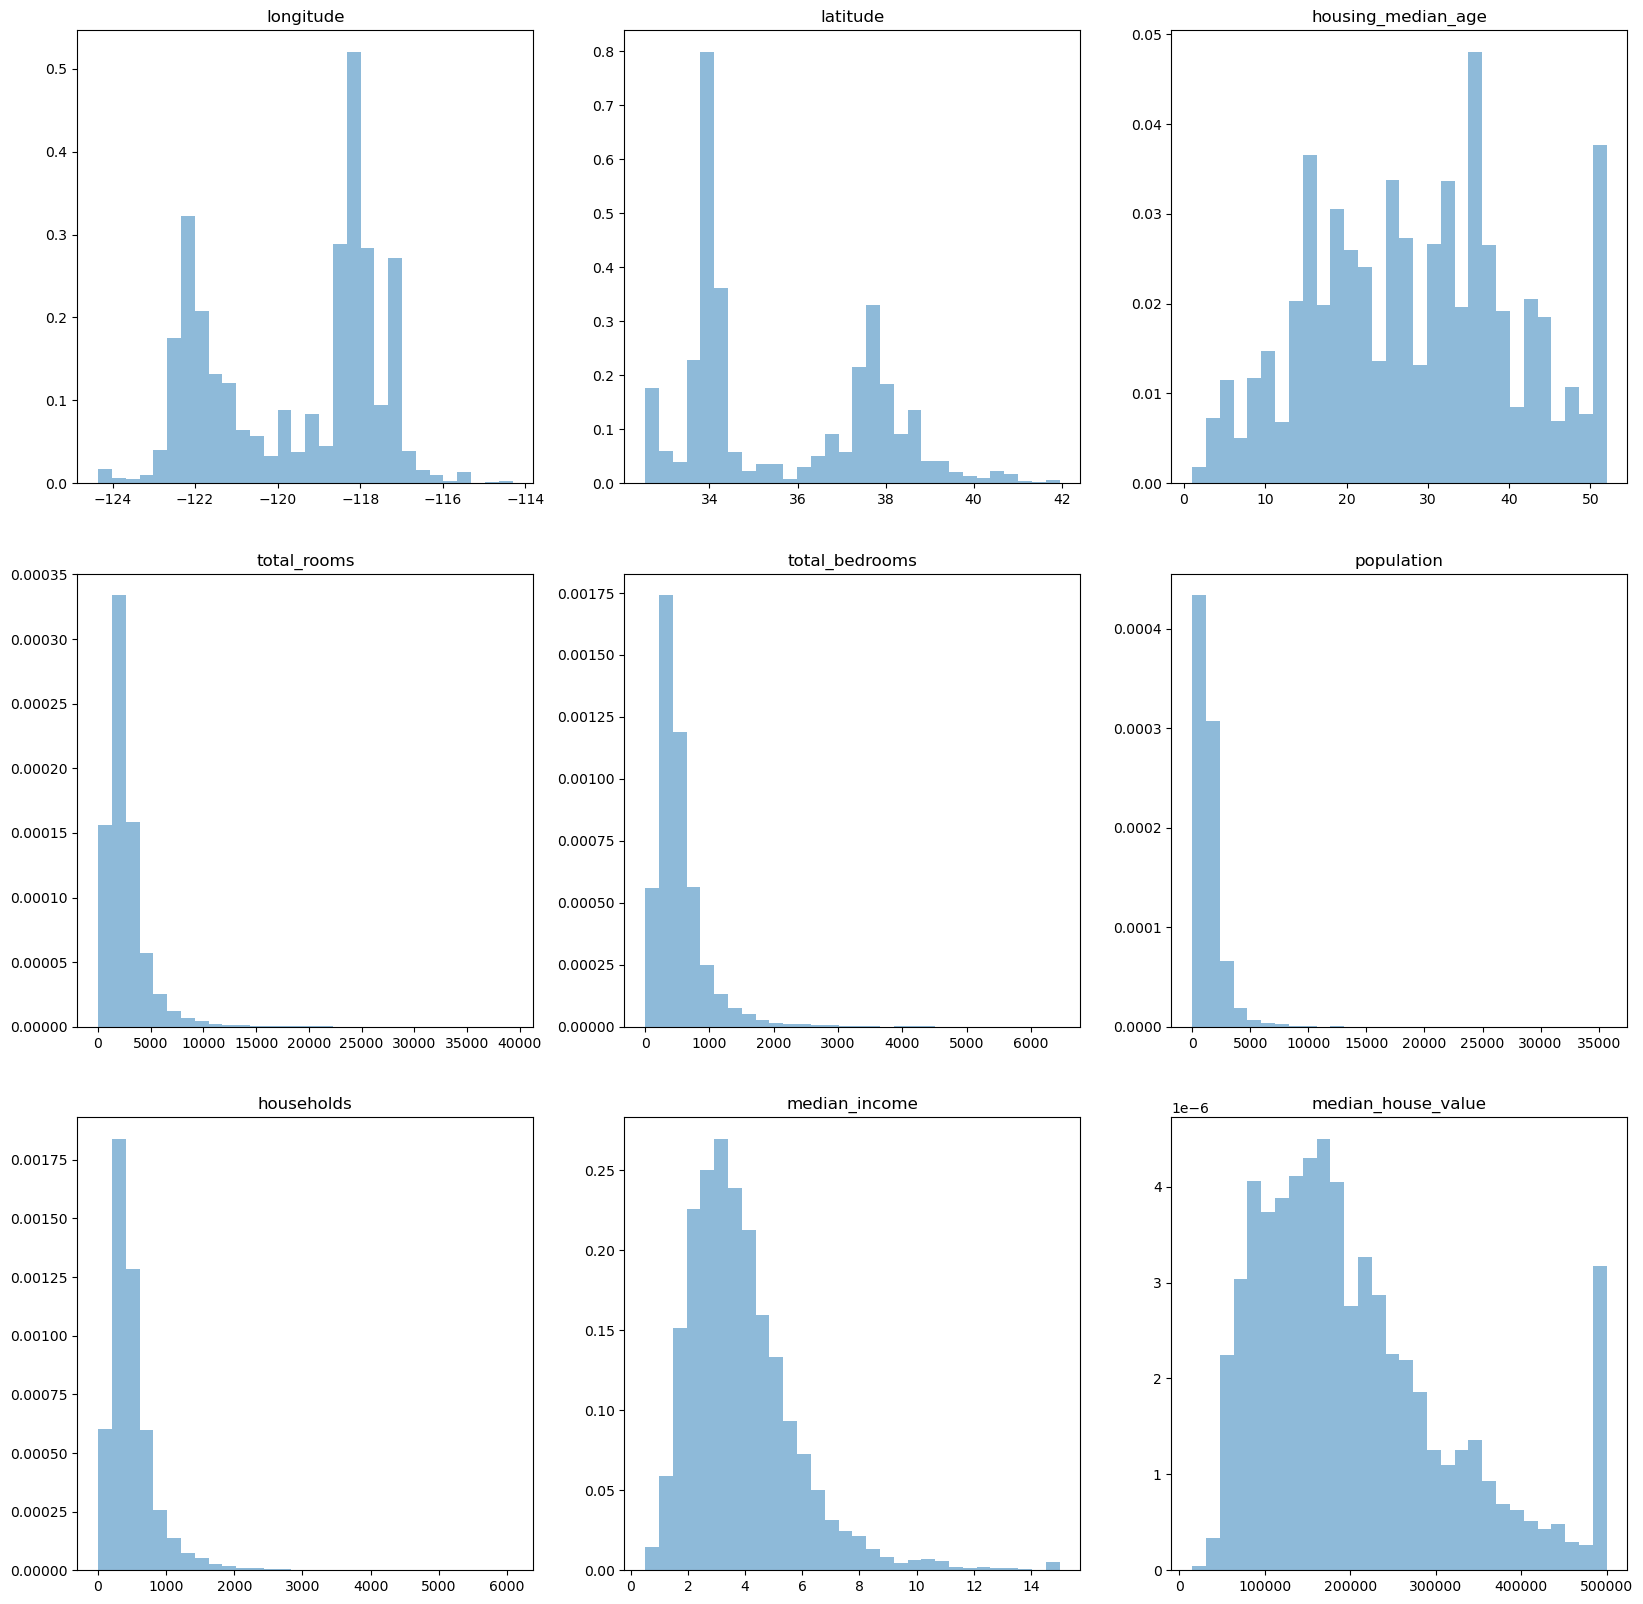

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
p=0;
for i in range(3):
    for j in range(3):
        axes[i,j].hist(df[columns[p]],bins=30, density=True, alpha=0.5)
        axes[i,j].set_title(columns[p])
        p+=1
plt.show()

In [16]:
def remove_outliers_iqr(data, factor=1.5):
    mean = np.mean(data)
    std = np.std(data)
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std
    data_cleaned = data[(data >= lower_limit) & (data <= upper_limit)]
    return data_cleaned

In [17]:
df1 = df.copy()
df1 = df1.dropna()
df1["total_rooms"] = np.log1p(df1["total_rooms"])
df1["total_bedrooms"] = np.log1p(df1["total_bedrooms"])
df1["population"] = np.log1p(df1["population"])
df1["households"] = np.log1p(df1["households"])
df1["median_income"] = np.log1p(df1["median_income"])
df1["median_house_value"] = np.log1p(df1["median_house_value"])

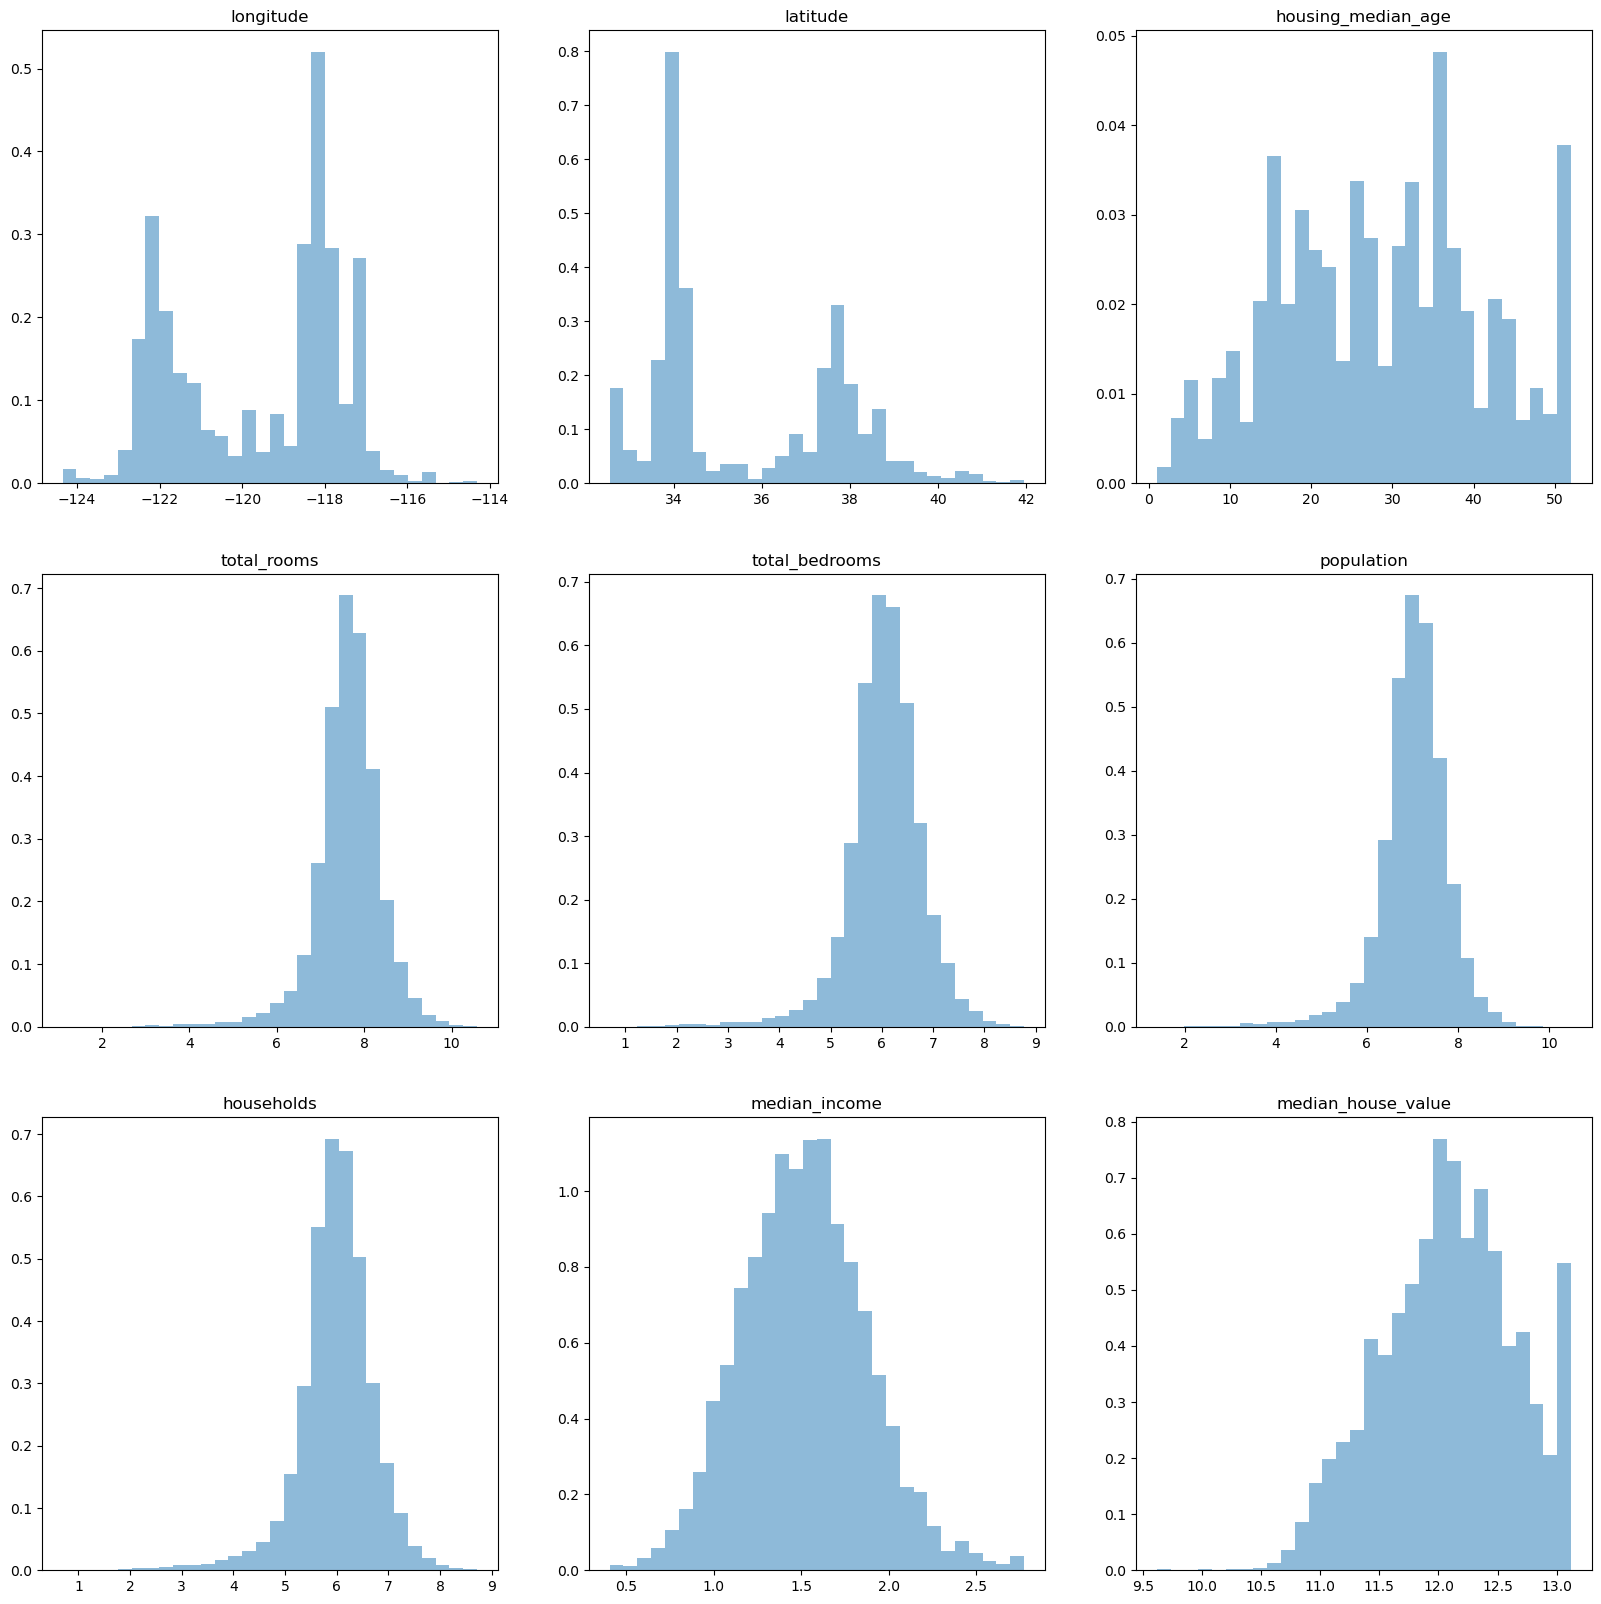

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
p=0;
for i in range(3):
    for j in range(3):
        axes[i,j].hist(df1[columns[p]],bins=30, density=True, alpha=0.5)
        axes[i,j].set_title(columns[p])
        p+=1
plt.show()

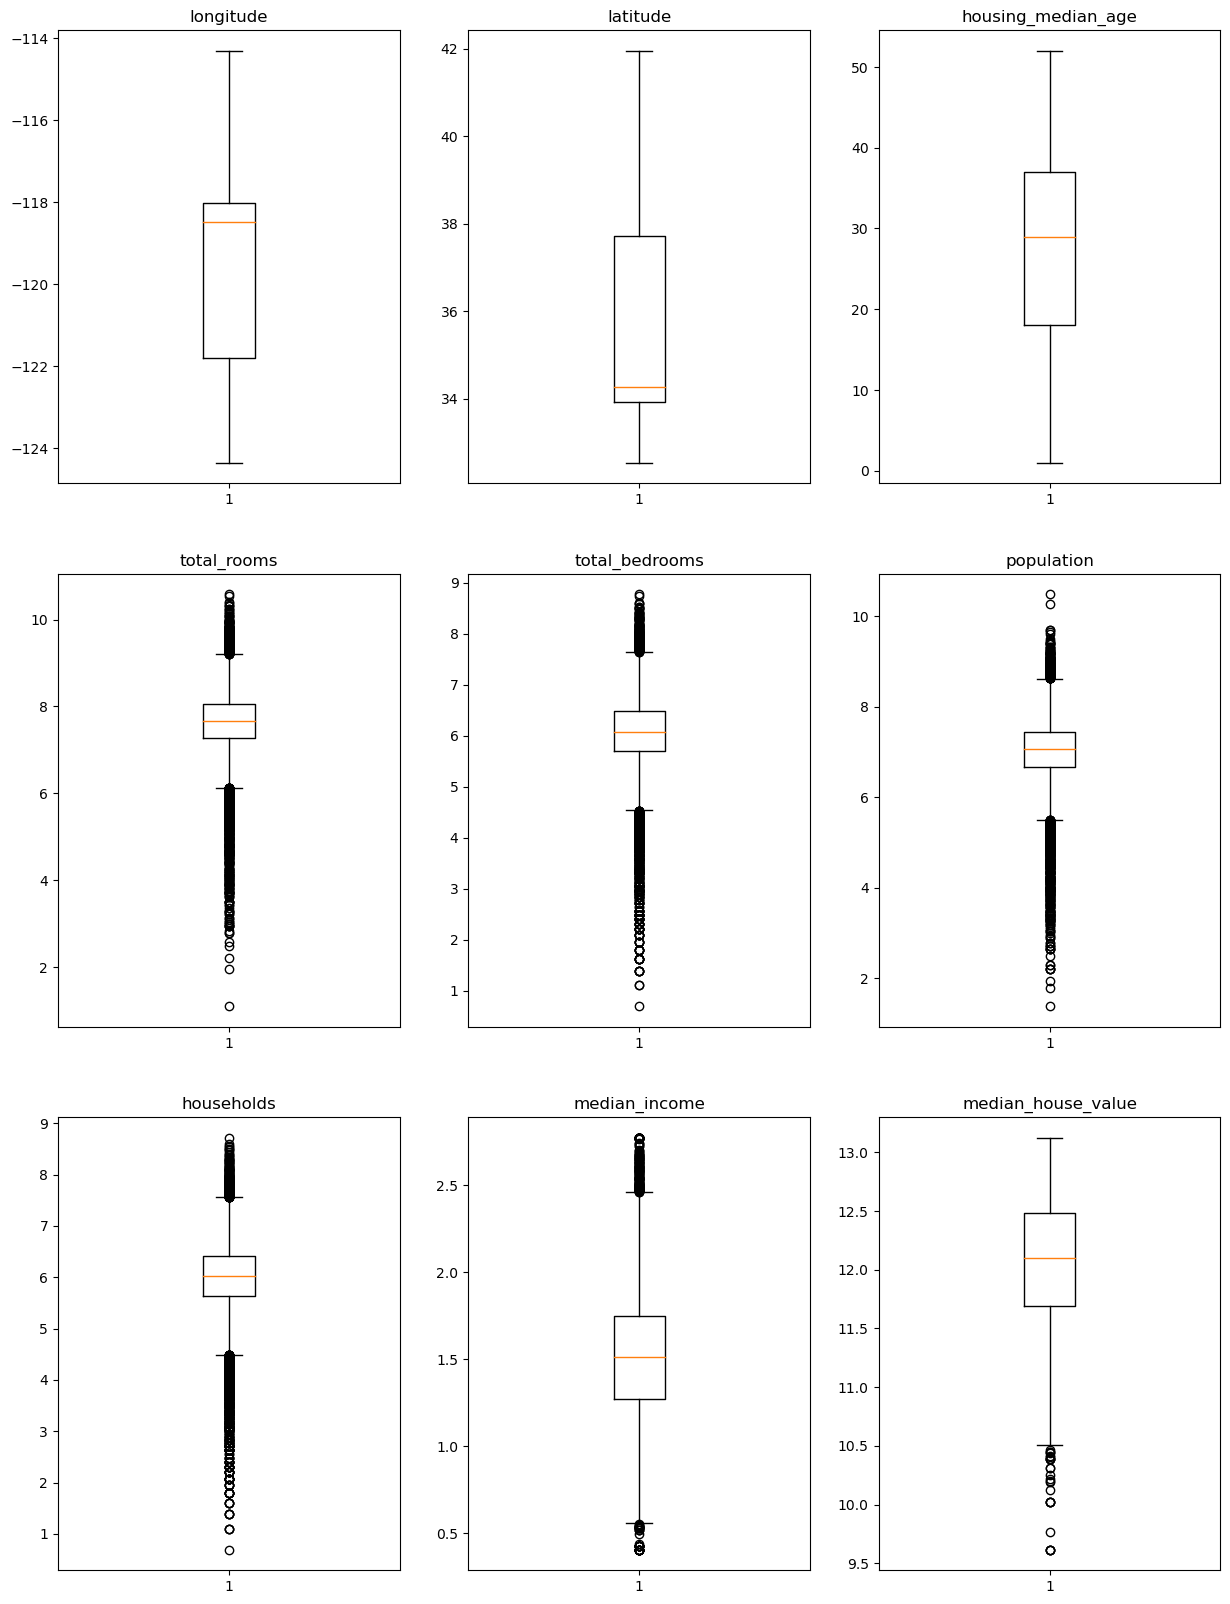

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
p=0;
for i in range(3):
    for j in range(3):
        axes[i,j].boxplot(df1[columns[p]])
        axes[i,j].set_title(columns[p])
        p+=1
plt.show()

In [20]:
for i in columns:
    df1[i] = remove_outliers_iqr(df1[i])

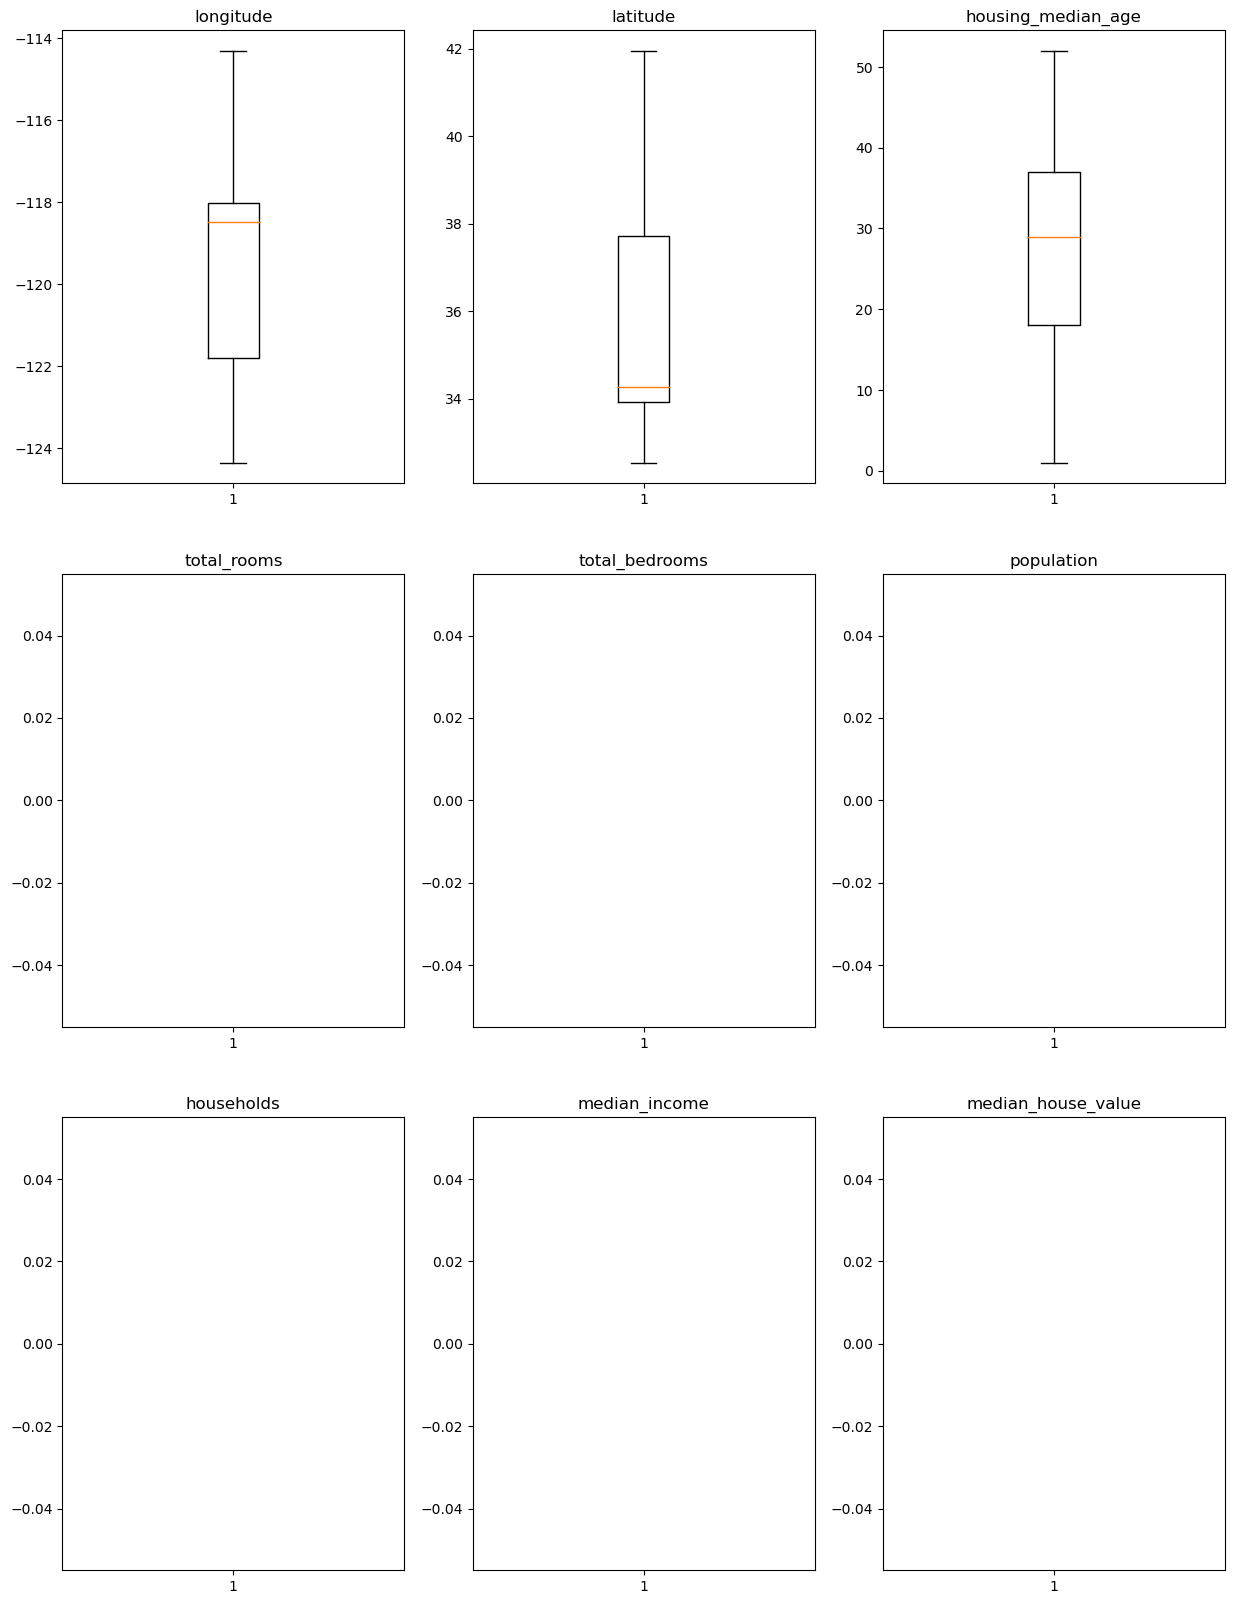

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
p=0;
for i in range(3):
    for j in range(3):
        axes[i,j].boxplot(df1[columns[p]])
        axes[i,j].set_title(columns[p])
        p+=1
plt.show()

In [22]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20122.000000,20128.000000,20126.000000,20117.000000,20311.000000,20417.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.668663,6.091804,7.064946,6.024359,1.512531,12.086507,1.166153
std,2.003578,2.136348,12.591805,0.645821,0.629669,0.637813,0.627860,0.347858,0.566381,1.420135
min,-124.350000,32.540000,1.000000,5.384495,3.891820,4.820282,3.806662,0.496706,10.389026,0.000000
25%,-121.800000,33.930000,18.000000,7.296413,5.710427,6.688355,5.655992,1.270463,11.693587,0.000000
50%,-118.490000,34.260000,29.000000,7.671827,6.084499,7.070724,6.025866,1.511009,12.099606,1.000000
75%,-118.010000,37.720000,37.000000,8.057615,6.476972,7.456888,6.410175,1.744843,12.487111,1.000000
max,-114.310000,41.950000,52.000000,9.864487,8.230577,9.204020,8.163656,2.592789,13.122367,4.000000
